In [14]:
EMB_FILE = "../datasets/leetcode_embeddings.npy"
MAP_FILE = "../datasets/cleaned_index_map.csv"
OUTPUT_CSV = "../datasets/kmeans_results.csv"

In [15]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [16]:
emb = np.load(EMB_FILE)   # shape (num_samples, 768)
df_map = pd.read_csv(MAP_FILE)  # contains index + cleaned_text
print("Embeddings shape:", emb.shape)

Embeddings shape: (1825, 768)


In [17]:
PCA_DIM = 50
pca = PCA(n_components=PCA_DIM, random_state=42)
emb_pca = pca.fit_transform(emb)
print("PCA reduced shape:", emb_pca.shape)

PCA reduced shape: (1825, 50)


/Users/adityasharma/miniconda3/envs/assessment-clustering/lib/python3.10/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/adityasharma/miniconda3/envs/assessment-clustering/lib/python3.10/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/adityasharma/miniconda3/envs/assessment-clustering/lib/python3.10/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/adityasharma/miniconda3/envs/assessment-clustering/lib/python3.10/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/adityasharma/miniconda3/envs/assessment-clustering/lib/python3.10/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/adityasharma/mini

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [19]:
results = []
cluster_labels = {}

K_VALUES = [2, 3, 4, 5, 6, 7]

for k in K_VALUES:
    print(f"\nRunning KMeans(k={k})...")

    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(emb_pca)

    # Score
    sil = silhouette_score(emb_pca, labels)
    print(f"Silhouette score for k={k}: {sil:.4f}")

    results.append({
        "k": k,
        "silhouette": sil
    })

    cluster_labels[k] = labels


Running KMeans(k=2)...
Silhouette score for k=2: 0.2112

Running KMeans(k=3)...
Silhouette score for k=3: 0.1382

Running KMeans(k=4)...


/Users/adityasharma/miniconda3/envs/assessment-clustering/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/adityasharma/miniconda3/envs/assessment-clustering/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/adityasharma/miniconda3/envs/assessment-clustering/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/adityasharma/miniconda3/envs/assessment-clustering/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/adityasharma/miniconda3/envs/assessment-clustering/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/adityasharma/miniconda3/envs/assessment-clustering/lib/python3.10/site-packages/sklear

Silhouette score for k=4: 0.1520

Running KMeans(k=5)...
Silhouette score for k=5: 0.1451

Running KMeans(k=6)...
Silhouette score for k=6: 0.1447

Running KMeans(k=7)...
Silhouette score for k=7: 0.1450


/Users/adityasharma/miniconda3/envs/assessment-clustering/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/adityasharma/miniconda3/envs/assessment-clustering/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/adityasharma/miniconda3/envs/assessment-clustering/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/adityasharma/miniconda3/envs/assessment-clustering/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/adityasharma/miniconda3/envs/assessment-clustering/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/adityasharma/miniconda3/envs/assessment-clustering/lib/python3.10/site-packages/sklear

In [20]:
df_results = pd.DataFrame(results)
df_results.to_csv(OUTPUT_CSV, index=False)
print("\nSaved:", OUTPUT_CSV)


Saved: ../datasets/kmeans_results.csv


In [ ]:
for k, labels in cluster_labels.items():
    df_map[f"kmeans_k{k}"] = labels

df_map.to_csv("../datasets/kmeans_cluster_assignments.csv", index=False)
print("Saved:", "../datasets/kmeans_cluster_assignments.csv")

Saved: kmeans_cluster_assignments.csv


Saved: silhouette_vs_k.png


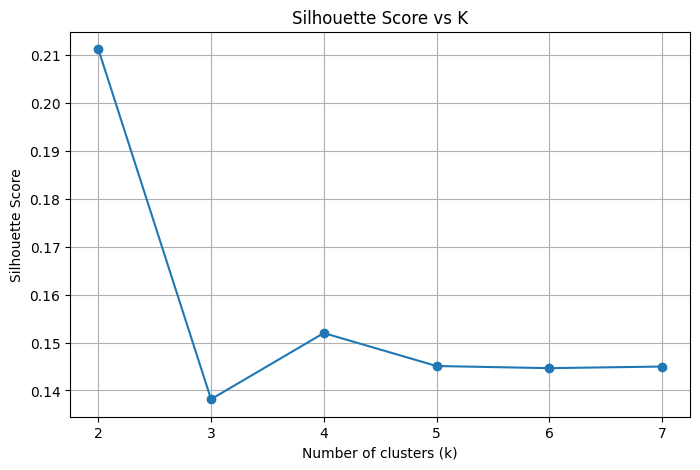

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(df_results["k"], df_results["silhouette"], marker="o")
plt.title("Silhouette Score vs K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.savefig("../results/silhouette_vs_k.png")
print("Saved:", "../results/silhouette_vs_k.png")
plt.show()